In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import os
from sys import platform
from importlib import reload
import sys
sys.path.append('../')

import stlstuff as sls
import imagestuff as ims
import statstuff as sts
import retrievestuff as rs

In [2]:
%matplotlib notebook

In [12]:
# Loading in the compressed data
Flattenedfilename = 'Segments2retrieved_compressed_flattened.npz'; print(Flattenedfilename)
flattenedfile = np.load(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(xgridtot)); print(nsegments)

Segments2retrieved_compressed_flattened.npz
25


In [27]:
x = [i for i in range(5)]
x

[0, 1, 2, 3, 4]

In [25]:
reload(rs)
# Histogram accumulation
accumlist = []

# Fill in a default
if len(accumlist==0):
    accumlist = [i for in in range(nsegments)]

# Parameters for accumulating 
plotthisone = -1
counts_total = []
bins_total = []
numforZ2hist = 10
Z2minforhist = 1e-5
Z2maxforhist = .5
Z2bins = np.linspace(Z2minforhist,Z2maxforhist,numforZ2hist); #print(Z2bins)

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    xgrid = xgridtot[isegment] 
    ygrid = ygridtot[isegment]
    Ny, Nx = np.shape(sollast); #print(sollast.shape)
    dx = xgrid[0,1]-xgrid[0,0]; #print('dx =', dx)
    dy = ygrid[1,0]-ygrid[0,0]; #print('dy =', dy)

    # Plot one of them
    if(isegment==plotthisone):
        fig1 = plt.figure()
        ax = fig1.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        ax.set_title(Flattenedfilename+str(isegment))
        ax.view_init(30, -10)
        
    # Get the probability distribution in Z2
    counts, bins = rs.getrhoofz2(sollast,dx,dy,bins=Z2bins)
    
    # Accumulate
    
    


[ 0.56607143  0.23571429  0.10892857  0.0577381   0.01785714  0.00892857
  0.00238095  0.00238095]


<IPython.core.display.Javascript object>


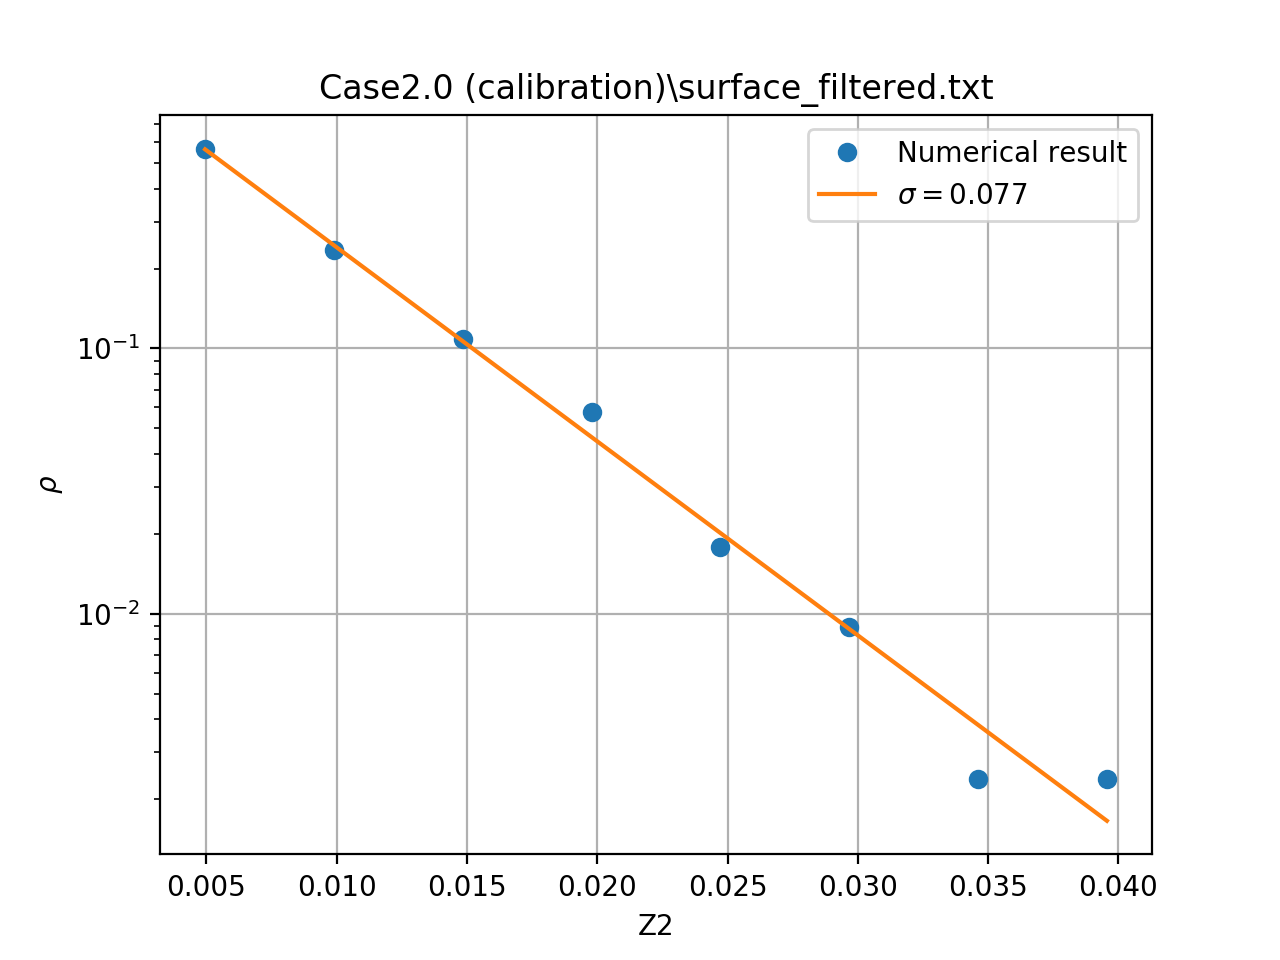

In [107]:
# Get the probability distribution in Z2
nbins = 9
counts, bins = retrievestuff.getrhoofz2(sollast,dx,dy,nbins=8)
print(counts)

# Graphing it
fig = plt.figure()
plt.semilogy(bins, counts, 'o', label='Numerical result')
plt.grid(True)
plt.xlabel('Z2')
plt.ylabel(r'$\rho$')
plt.title(foldername+slash+filename)

# Line fitting
subset = np.array([i for i in range(0,len(bins))])
newbins = bins
logcounts = np.log(counts[subset])
p = np.polyfit(newbins[subset], logcounts, 1)
sigma = 1/(-p[0])**.5
sigma = int(sigma*1000)/1000
plt.semilogy(bins, np.exp(np.polyval(p,bins)), label=r'$\sigma = $'+str(sigma))

# Add a legend
plt.legend()